# Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import find_dotenv
import house_climate
import json

In [3]:
REPO_ROOT = Path(find_dotenv()).parent
POSTPROCESSED_PATH = REPO_ROOT / "data" / "processed" / "with_features.parquet"
DAYS_PATH = REPO_ROOT / "data" / "interim" / "days.parquet"
ZONE_METADATA_PATH = REPO_ROOT / "data" / "interim" / "zone_metadata.json"

___

## Load df from disk

In [4]:
postprocessed = pd.read_parquet(POSTPROCESSED_PATH)
postprocessed

,humidity,temperature,zone_id,value,weather,exterior_temp,zone_type,zone_name,hours_in_day,hour_of_day,day_of_week,day_of_year,day_night,is_weekend
timestamp,,,,,,,,,,,,,,
2021-12-31 23:45:00+00:00,0.500,20.00,1,NONE,UNKNOWN,NaN,HEATING,Living room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,2,NONE,UNKNOWN,NaN,HEATING,Bedroom,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,6,NONE,UNKNOWN,NaN,HEATING,Haadiyah Room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,7,NONE,UNKNOWN,NaN,HEATING,Ensuite,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,9,NONE,UNKNOWN,NaN,HEATING,Office,24.0,23,4,365,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:15:00+00:00,0.557,19.87,9,HIGH,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.585,20.06,10,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.579,20.35,12,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False


In [5]:
postprocessed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4190470 entries, 2021-12-31 23:45:00+00:00 to 2023-01-02 00:15:00+00:00
Data columns (total 14 columns):
 #   Column         Dtype   
---  ------         -----   
 0   humidity       float64 
 1   temperature    float64 
 2   zone_id        Int8    
 3   value          object  
 4   weather        object  
 5   exterior_temp  float64 
 6   zone_type      object  
 7   zone_name      object  
 8   hours_in_day   float64 
 9   hour_of_day    int64   
 10  day_of_week    int64   
 11  day_of_year    int64   
 12  day_night      category
 13  is_weekend     bool    
dtypes: Int8(1), bool(1), category(1), float64(4), int64(3), object(4)
memory usage: 399.6+ MB


In [6]:
days = pd.read_parquet(DAYS_PATH)
days

,zone_id,zone_type,zone_name,hours_in_day,historic_data,zone_metadata,extracted_datetime
45,1,HEATING,Living room,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-10-14T13:54:26.696Z', 'd...",2022-01-01 00:00:00+00:00
23,2,HEATING,Bedroom,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-10-18T13:33:17.982Z', 'd...",2022-01-01 00:00:00+00:00
46,6,HEATING,Haadiyah Room,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-02T18:51:08.031Z', 'd...",2022-01-01 00:00:00+00:00
11,7,HEATING,Ensuite,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-02T19:00:42.012Z', 'd...",2022-01-01 00:00:00+00:00
0,9,HEATING,Office,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-02T20:05:04.960Z', 'd...",2022-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
7,9,HEATING,Office,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-02T20:05:04.960Z', 'd...",2023-01-01 00:00:00+00:00
6,10,HEATING,Downstairs hallway,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-02T23:20:51.490Z', 'd...",2023-01-01 00:00:00+00:00
8,12,HEATING,Upstairs hallway,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2020-12-25T09:39:10.393Z', 'd...",2023-01-01 00:00:00+00:00
5,16,HEATING,Sufyaan room,24,{'callForHeat': {'dataIntervals': [{'from': '2...,"{'dateCreated': '2022-07-11T23:15:00.266Z', 'd...",2023-01-01 00:00:00+00:00


In [7]:
zone_name_lookup = json.loads(ZONE_METADATA_PATH.read_text())
zone_name_lookup

{'1': 'Living room',
 '10': 'Downstairs hallway',
 '12': 'Upstairs hallway',
 '16': 'Sufyaan room',
 '17': 'Upstairs bathroom',
 '2': 'Bedroom',
 '6': 'Haadiyah Room',
 '7': 'Ensuite',
 '9': 'Office'}

___

## Visualisations

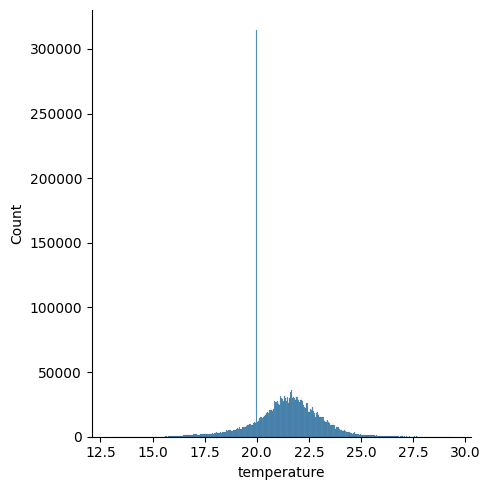

In [5]:
sns.displot(data=postprocessed, x='temperature')

<Axes: xlabel='temperature', ylabel='Density'>

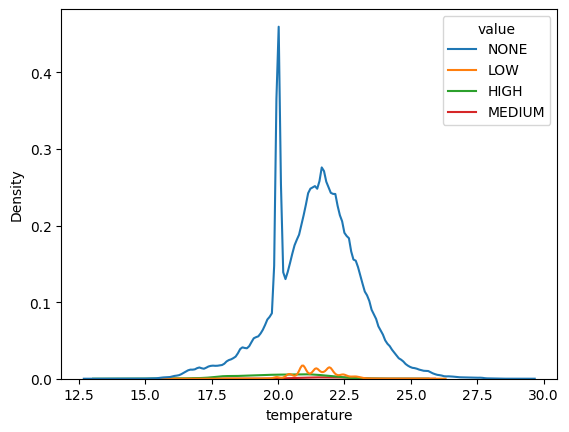

In [6]:
sns.kdeplot(data=postprocessed, x='temperature', hue='value', )

<Axes: xlabel='temperature', ylabel='Density'>

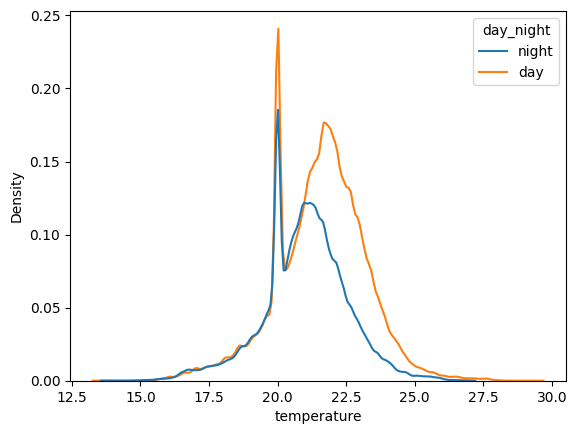

In [7]:
sns.kdeplot(data=postprocessed, x='temperature', hue='day_night', )

<Axes: xlabel='temperature', ylabel='Density'>

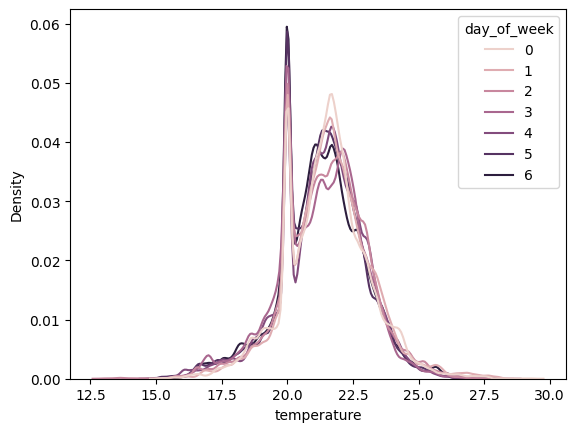

In [8]:
sns.kdeplot(data=postprocessed, x='temperature', hue='day_of_week')

<Axes: xlabel='temperature', ylabel='Density'>

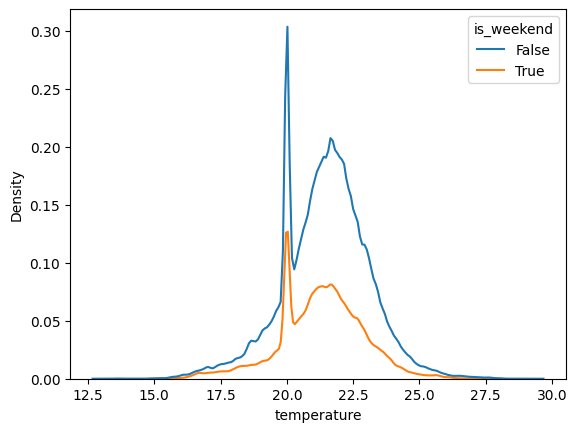

In [9]:
sns.kdeplot(data=postprocessed, x='temperature', hue='is_weekend')

<Axes: xlabel='temperature', ylabel='Density'>

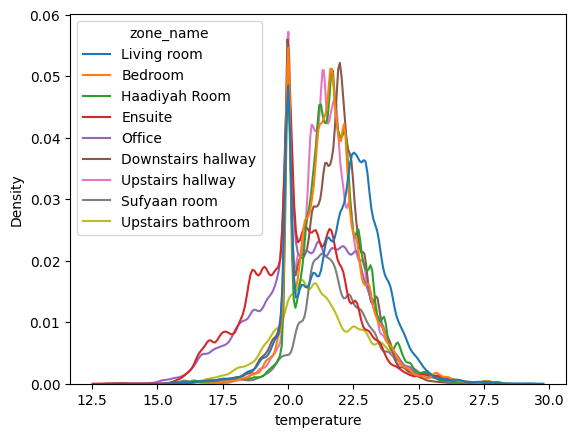

In [10]:
sns.kdeplot(data=postprocessed, x='temperature', hue='zone_name')

<Axes: xlabel='day_of_year', ylabel='temperature'>

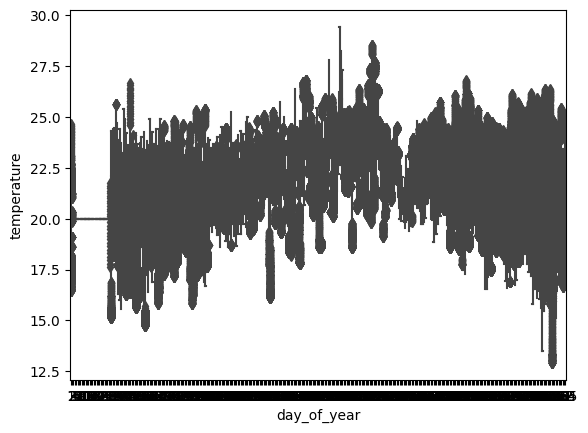

In [11]:
sns.boxplot(data=postprocessed, y='temperature', x='day_of_year')

<Axes: xlabel='day_of_week', ylabel='temperature'>

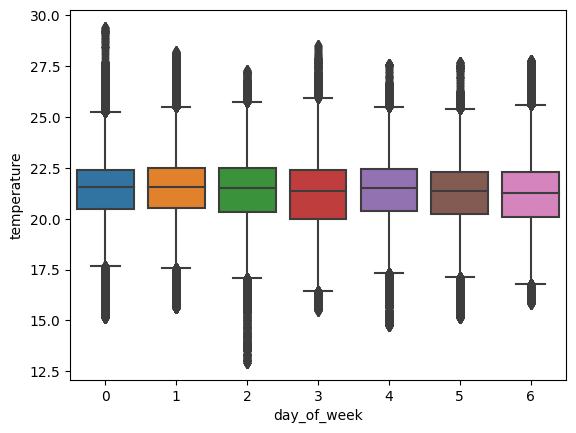

In [12]:
sns.boxplot(data=postprocessed, y='temperature', x='day_of_week')

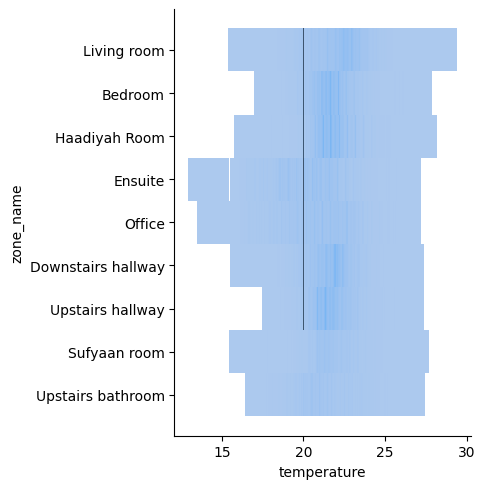

In [4]:
sns.displot(data=postprocessed, x='temperature', y='zone_name')

---

<Axes: xlabel='temperature', ylabel='exterior_temp'>

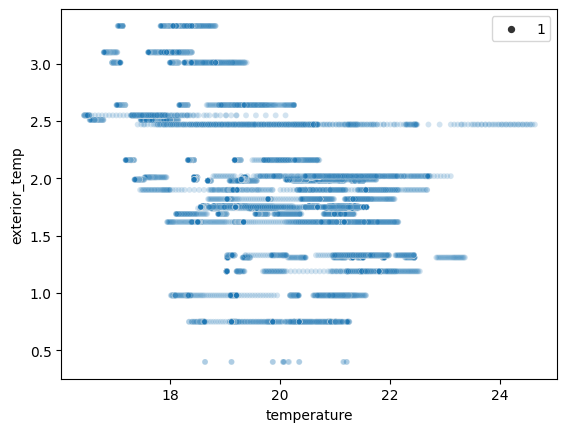

In [10]:
sns.scatterplot(data=postprocessed, x='temperature', y='exterior_temp', alpha=0.2, size=1)

In [19]:
postprocessed

,humidity,temperature,zone_id,value,weather,exterior_temp,zone_type,zone_name,hours_in_day,hour_of_day,day_of_week,day_of_year,day_night,is_weekend
timestamp,,,,,,,,,,,,,,
2021-12-31 23:45:00+00:00,0.500,20.00,1,NONE,UNKNOWN,NaN,HEATING,Living room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,2,NONE,UNKNOWN,NaN,HEATING,Bedroom,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,6,NONE,UNKNOWN,NaN,HEATING,Haadiyah Room,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,7,NONE,UNKNOWN,NaN,HEATING,Ensuite,24.0,23,4,365,NaN,False
2021-12-31 23:45:00+00:00,0.500,20.00,9,NONE,UNKNOWN,NaN,HEATING,Office,24.0,23,4,365,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02 00:15:00+00:00,0.557,19.87,9,HIGH,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.585,20.06,10,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False
2023-01-02 00:15:00+00:00,0.579,20.35,12,NONE,NIGHT_CLOUDY,0.4,HEATING,Upstairs bathroom,24.0,0,0,2,NaN,False


In [18]:
postprocessed.groupby("zone_id").apply(lambda x: x.drop_duplicates())

humidity  temperature  zone_id value  \
zone_id timestamp                                                         
1       2021-12-31 23:45:00+00:00     0.500    20.000000        1  NONE   
        2022-01-01 00:00:00+00:00     0.500    20.000000        1  NONE   
        2022-01-01 01:00:00+00:00     0.500    20.000000        1  NONE   
        2022-01-01 02:00:00+00:00     0.500    20.000000        1  NONE   
        2022-01-01 03:00:00+00:00     0.500    20.000000        1  NONE   
...                                     ...          ...      ...   ...   
17      2023-01-01 23:43:00+00:00     0.597    19.126667       17  NONE   
        2023-01-01 23:44:00+00:00     0.597    19.123333       17  NONE   
        2023-01-01 23:45:00+00:00     0.597    19.120000       17  NONE   
        2023-01-02 00:00:00+00:00     0.597    19.120000       17  NONE   
        2023-01-02 00:14:00+00:00     0.597    19.120000       17  NONE   

                                        weather  exterior_temp zone_type  \
zone_id timestamp                                                          
1       2021-12-31 23:45:00+00:00       UNKNOWN            NaN   HEATING   
        2022-01-01 00:00:00+00:00       UNKNOWN            NaN   HEATING   
        2022-01-01 01:00:00+00:00       UNKNOWN            NaN   HEATING   
        2022-01-01 02:00:00+00:00       UNKNOWN            NaN   HEATING   
        2022-01-01 03:00:00+00:00       UNKNOWN            NaN   HEATING   
...                                         ...            ...       ...   
17      2023-01-01 23:43:00+00:00  NIGHT_CLOUDY           0.75   HEATING   
        2023-01-01 23:44:00+00:00  NIGHT_CLOUDY           0.75   HEATING   
        2023-01-01 23:45:00+00:00  NIGHT_CLOUDY           0.75   HEATING   
        2023-01-02 00:00:00+00:00  NIGHT_CLOUDY           0.75   HEATING   
        2023-01-02 00:14:00+00:00  NIGHT_CLOUDY           0.40   HEATING   

                                           zone_name  hours_in_day  \
zone_id timestamp                                                    
1       2021-12-31 23:45:00+00:00        Living room          24.0   
        2022-01-01 00:00:00+00:00        Living room          24.0   
        2022-01-01 01:00:00+00:00        Living room          24.0   
        2022-01-01 02:00:00+00:00        Living room          24.0   
        2022-01-01 03:00:00+00:00        Living room          24.0   
...                                              ...           ...   
17      2023-01-01 23:43:00+00:00  Upstairs bathroom          24.0   
        2023-01-01 23:44:00+00:00  Upstairs bathroom          24.0   
        2023-01-01 23:45:00+00:00  Upstairs bathroom          24.0   
        2023-01-02 00:00:00+00:00  Upstairs bathroom          24.0   
        2023-01-02 00:14:00+00:00  Upstairs bathroom          24.0   

                                   hour_of_day  day_of_week  day_of_year  \
zone_id timestamp                                                          
1       2021-12-31 23:45:00+00:00           23            4          365   
        2022-01-01 00:00:00+00:00            0            5            1   
        2022-01-01 01:00:00+00:00            1            5            1   
        2022-01-01 02:00:00+00:00            2            5            1   
        2022-01-01 03:00:00+00:00            3            5            1   
...                                        ...          ...          ...   
17      2023-01-01 23:43:00+00:00           23            6            1   
        2023-01-01 23:44:00+00:00           23            6            1   
        2023-01-01 23:45:00+00:00           23            6            1   
        2023-01-02 00:00:00+00:00            0            0            2   
        2023-01-02 00:14:00+00:00            0            0            2   

                                  day_night  is_weekend  
zone_id timestamp                                        
1       2021-12-31 23:45:00+00:00       NaN       Fals

<Axes: xlabel='temperature', ylabel='exterior_temp'>

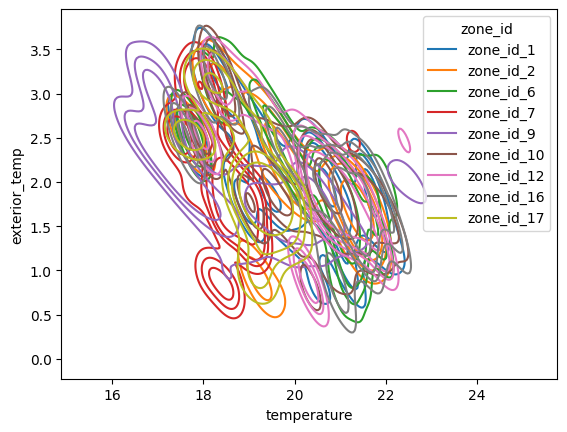

In [26]:
sns.kdeplot(
    data=(
        postprocessed
        .groupby("zone_id").apply(lambda x: x.drop_duplicates())
        .assign(zone_id=lambda x: x.zone_id.apply(lambda y: f"zone_id_{y}"))
    ),
    x='temperature', 
    y='exterior_temp', 
    hue="zone_id",
    levels=5,
    thresh=0.2,
)

In [134]:
postprocessed.groupby("zone_name")["temperature"].median().iloc[::-1].sort_values().index

Index(['Ensuite', 'Office', 'Upstairs bathroom', 'Upstairs hallway', 'Bedroom',
       'Downstairs hallway', 'Haadiyah Room', 'Sufyaan room', 'Living room'],
      dtype='object', name='zone_name')

Text(0.5, 1.0, 'Interior temp distribution vs zone name')

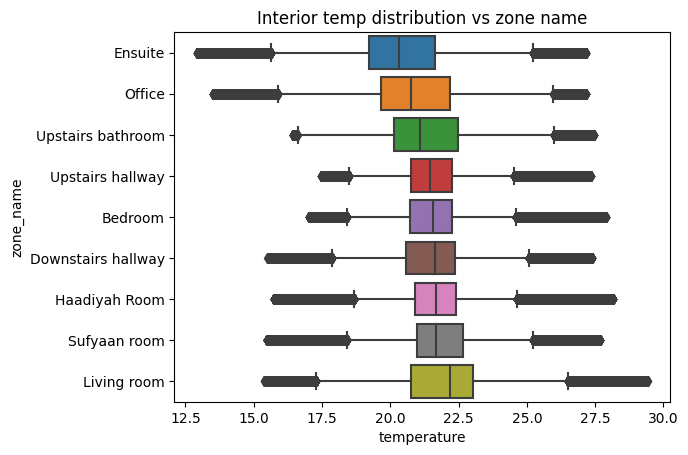

In [138]:
sns.boxplot(
    data=(
        postprocessed
    ),
    x="temperature",
    y="zone_name",
    order=postprocessed.groupby("zone_name")["temperature"].median().iloc[::-1].sort_values().index,
)
plt.title("Interior temp distribution vs zone name")

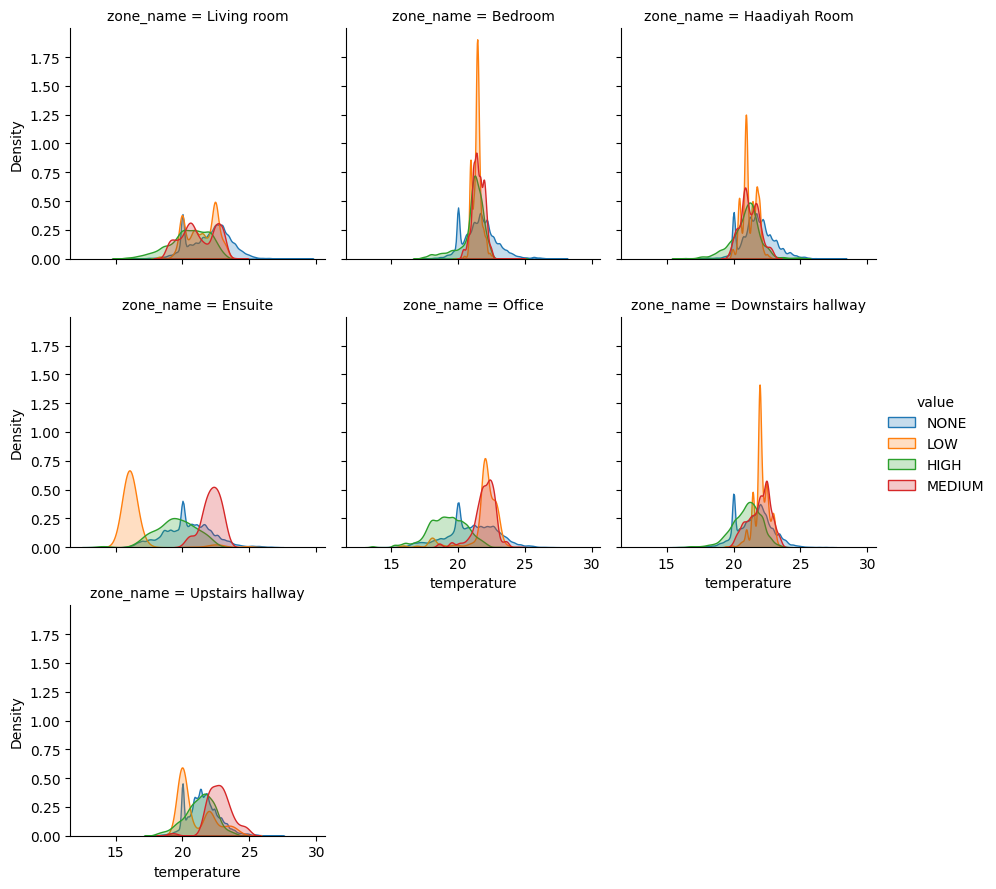

In [140]:
# Faceted kdeplot of temp vs zone name and coloured by heating value
g = sns.FacetGrid(
    data=(
        postprocessed
        .assign(zone_name=lambda x: x.zone_id.astype(str).map(zone_name_lookup.get))
        .query('zone_id != 16 and zone_id != 17')
        # .sample(1000)
    ),
    col="zone_name",
    col_wrap=3,
    hue="value",
)
g.map_dataframe(sns.kdeplot, x="temperature", fill=True)
g.add_legend()

(0.0, 1.0)

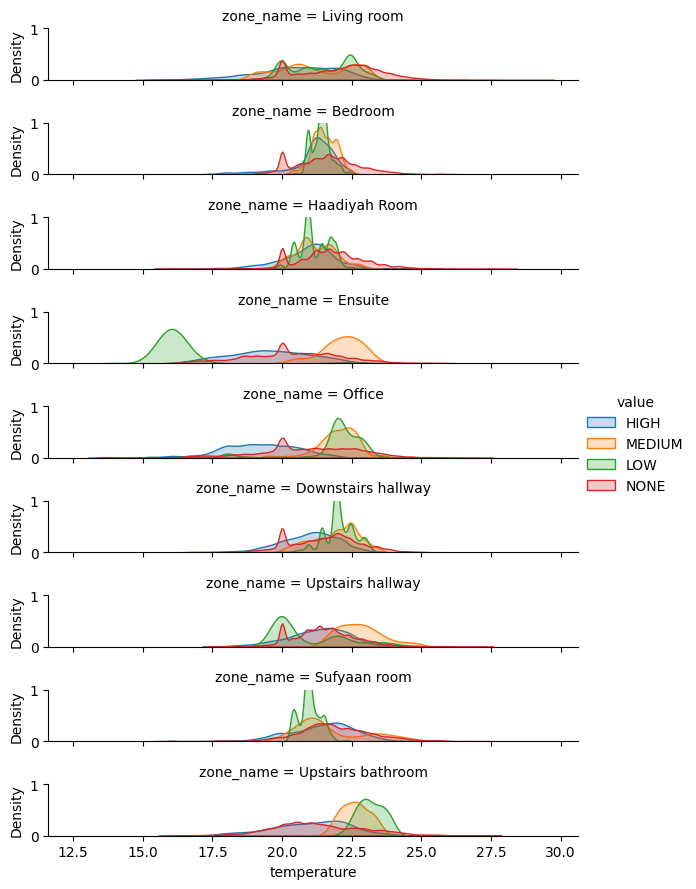

In [32]:
# Faceted kdeplot of temp vs heating value for living room only
g = sns.FacetGrid(
    data=(
        postprocessed
        .assign(zone_name=lambda x: x.zone_id.astype(str).map(zone_name_lookup.get))
        # .assign(value=lambda x: x.value.map({"NONE": 0, "LOW": 1, "MEDIUM": 2, "HIGH": 3}.get))
        # .query('zone_name == "Living room"')
        # .sample(1000)
    ),
    col="zone_name",
    col_wrap=1,
    height=1,
    aspect=6,
    hue="value",
    hue_order=["HIGH", "MEDIUM", "LOW", "NONE"],
    # palette="magma",
)
g.map_dataframe(sns.kdeplot, x="temperature", fill=True)
g.add_legend()
plt.ylim((0,1))

Text(0.5, 1.0, 'Living room temperature, histogram')

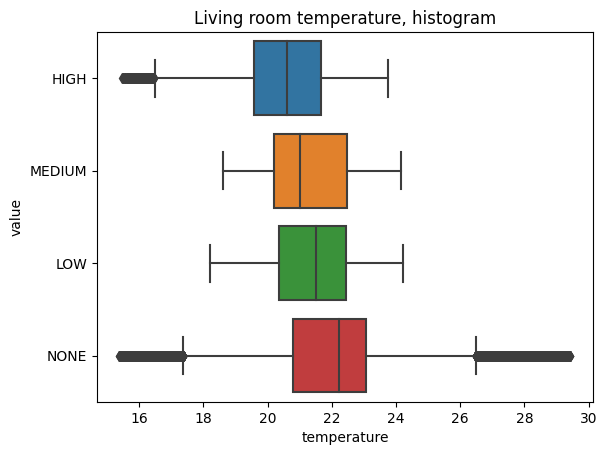

In [167]:
# Faceted kdeplot of temp vs zone name and coloured by heating value
sns.boxplot(
    data=(
        postprocessed
        .assign(zone_name=lambda x: x.zone_id.astype(str).map(zone_name_lookup.get))
        .query('zone_name == "Living room"')
        # .sample(1000)
    ),
    x="temperature",
    y="value",
    order=["HIGH", "MEDIUM", "LOW", "NONE"]
)
plt.title("Living room temperature, histogram")
# plt.ylim((0,15000))

Text(0.5, 1.0, '')

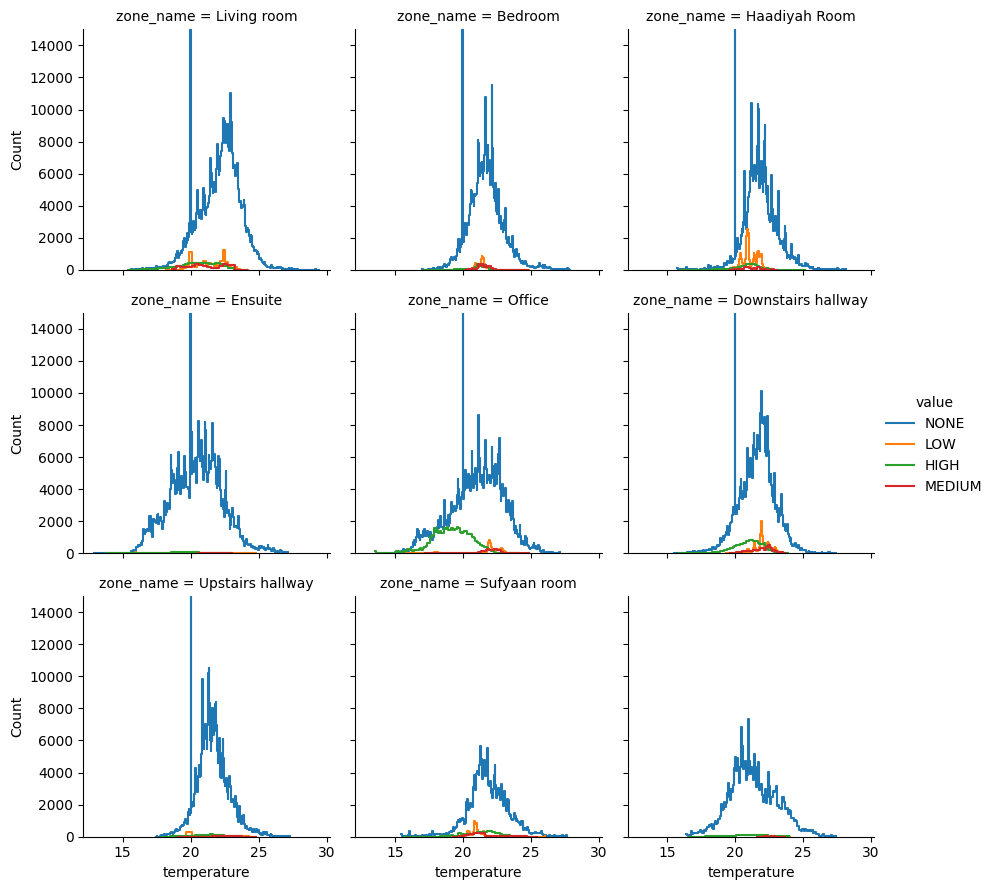

In [141]:
# Get a better sense of the scale of each category by plotting facetted histograms
g = sns.FacetGrid(
    data=(
        postprocessed
        # .query('zone_id != 16 and zone_id != 17')
        # .sample(1000)
        .assign(zone_name=lambda x: x.zone_id.astype(str).map(zone_name_lookup.get))
    ),
    col="zone_name",
    col_wrap=3,
    hue="value",
)
g.map_dataframe(sns.histplot, x="temperature", element="step", fill=False)
g.add_legend()
plt.ylim((0,15000))
plt.title("")

# Obeservations
- Strange spike in temperature histograms around 20degrees.  Is there a data quality issue here?
- We see high heating use when temperatures are low.  Makes sense as this is when you want to warm up the house!
- Slightly odd inverse relationship between exterior temp and interior temp.  Might be that we read high temps on cold days because we intentionally heat the house extra, and radiator temp sensors are biased by proximity to the heat source.
    - Remember it seems we only have exterior temp for winter months, may skew things.